In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

In [2]:
!git clone https://github.com/miladfa7/Image-Classification-Transfer-Learning.git

Cloning into 'Image-Classification-Transfer-Learning'...
remote: Enumerating objects: 2102, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 2102 (delta 7), reused 6 (delta 1), pack-reused 2084 (from 1)
Receiving objects: 100% (2102/2102), 90.89 MiB | 22.23 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [3]:
import os

# Change the directory to the Dataset folder
os.chdir('/content/Image-Classification-Transfer-Learning/Dataset')

# List the contents to verify the dataset is there
!ls

test  training


In [4]:
# Configuration
img_h, img_w = 256, 256
batch_size = 8
num_classes = 20
seed = 1234
dataset_dir = '/content/Image-Classification-Transfer-Learning/Dataset'

In [21]:
test_gen = '/content/Image-Classification-Transfer-Learning/Dataset/test'
train_dir = '/content/Image-Classification-Transfer-Learning/Dataset/training'

In [6]:
# Classes
classes = ['owl', 'galaxy', 'lightning', 'wine-bottle', 't-shirt', 'waterfall', 'sword', 'school-bus',
           'calculator', 'sheet-music', 'airplanes', 'lightbulb', 'skyscraper', 'mountain-bike', 'fireworks',
           'computer-monitor', 'bear', 'grand-piano', 'kangaroo', 'laptop'] #classes from 0 to 19

In [27]:
# ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [28]:
train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1554 images belonging to 20 classes.


In [44]:
print(f"Training samples: {train_gen.n}")
print(f"Validation samples: {valid_gen.n}")
print(f"Test samples: {test_gen.n}")

Training samples: 1247
Validation samples: 307
Test samples: 0


In [47]:
# Print the number of samples and classes for train, validation, and test generators
print(f"Training samples: {train_gen.n} images for {num_classes_train} classes ")
print(f"Validation samples: {valid_gen.n} images for {num_classes_valid} classes")
print(f"Test samples: {test_gen.n} images for {num_classes_test} classes ")

Training samples: 1247 images for 20 classes 
Validation samples: 307 images for 20 classes
Test samples: 0 images for 0 classes 


In [9]:
test_dir = os.path.join(dataset_dir, 'test')  # Update 'test' to your actual test folder name
import os

# List files in the parent directory
print(os.listdir('/content/Image-Classification-Transfer-Learning/Dataset'))

['training', 'test']


In [30]:
# ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_image_paths = [os.path.join(test_dir, fname) for fname in os.listdir(test_dir) if fname.endswith(('.jpg', '.png'))]

In [31]:
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    return img_array

In [32]:
test_images = [preprocess_image(path) for path in test_image_paths]
test_images = tf.concat(test_images, axis=0)

In [33]:
# Build the model
base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(20, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 56, 56, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 56, 56, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 58, 58, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 60,450,324 (230.60 MB)

 Trainable params: 60,306,580 (230.05 MB)

 Non-trainable params: 143,744 (561.50 KB)

In [ ]:
# from keras.utils import plot_model
# plot_model(model)

In [35]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=train_generator  # Use a portion of training data as validation data
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.6041 - loss: 1.5361 - val_accuracy: 0.9717 - val_loss: 0.1037
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 44s 893ms/step - accuracy: 0.9814 - loss: 0.0751 - val_accuracy: 0.9968 - val_loss: 0.0134
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 43s 862ms/step - accuracy: 0.9868 - loss: 0.0451 - val_accuracy: 0.9981 - val_loss: 0.0100
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 884ms/step - accuracy: 0.9934 - loss: 0.0350 - val_accuracy: 0.9936 - val_loss: 0.0198
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 860ms/step - accuracy: 0.9865 - loss: 0.0525 - val_accuracy: 0.9852 - val_loss: 0.0475
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 43s 872ms/step - accuracy: 0.9847 - loss: 0.0559 - val_accuracy: 0.9936 - val_loss: 0.0248
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 883ms/step - accuracy: 0.9909 - loss: 0.0339 - val_accuracy: 0.9936 - val_loss: 0.0271
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 43s 861ms/step - accuracy: 0.9860 - loss: 0.0494 - val_accura

In [36]:
# Evaluate the model on training data (as test data isn't labeled)
loss, accuracy = model.evaluate(train_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.9858 - loss: 0.0574
Test Loss: 0.04982534050941467
Test Accuracy: 0.9864864945411682


In [37]:
# Predict on test images
predictions = model.predict(test_images)

16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 943ms/step


In [39]:
import matplotlib.pyplot as plt

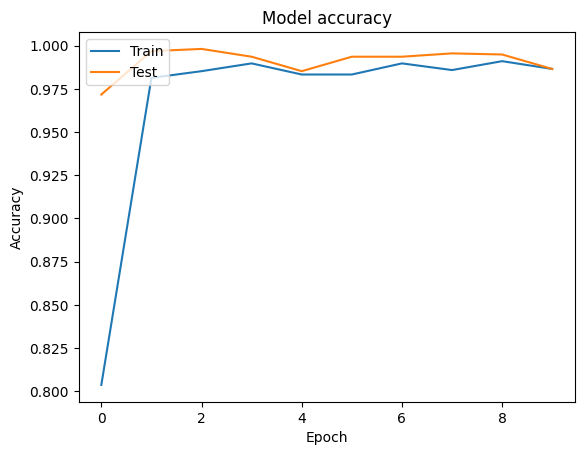

In [41]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

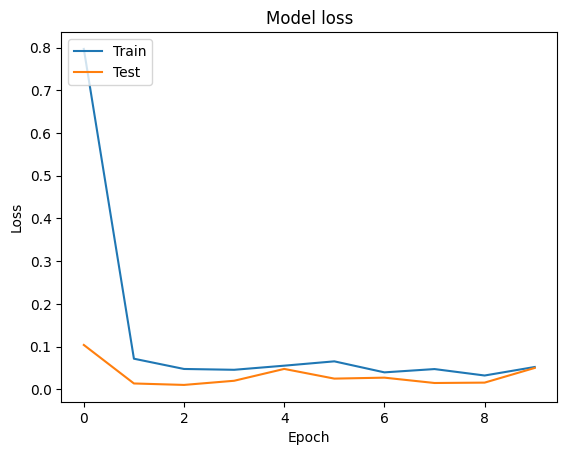

In [42]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()